<a href="https://colab.research.google.com/github/AmitS1009/ML_Projects/blob/main/Machine_Downtime_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

DATA Collection :

In [62]:
data = pd.read_csv('/content/Machine Downtime.csv')

In [63]:
data.shape

(2500, 16)

DATA Analysis & Visualization :

In [64]:
data.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [65]:
data.describe()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,2490.000000,2481.000000,2483.000000,2488.000000,2484.000000,2493.000000,2489.000000,2489.000000,2494.000000,2494.000000,2479.000000,2493.000000
mean,101.409084,4.947058,6.499275,18.559887,47.618317,35.063698,1.009334,25.411975,20274.792302,348.996792,25.234968,2.782551
std,30.289301,0.997357,0.407279,8.554480,3.768674,3.764823,0.342898,6.437142,3852.660056,45.376024,6.138564,0.616688
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000
25%,76.355000,4.462464,6.217987,10.400000,45.100000,32.500000,0.777000,21.089000,17919.000000,319.000000,21.666115,2.250000
50%,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000
75%,126.415727,5.518401,6.780550,25.600000,50.100000,37.600000,1.236000,29.790000,22501.750000,380.000000,30.514008,3.270000
max,191.000000,11.350000,7.973992,98.200000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


In [66]:
data['Downtime'].value_counts()

,count
Downtime,
Machine_Failure,1265
No_Machine_Failure,1235


In [67]:
data.isnull().sum()

,0
Date,0
Machine_ID,0
Assembly_Line_No,0
Hydraulic_Pressure(bar),10
Coolant_Pressure(bar),19
Air_System_Pressure(bar),17
Coolant_Temperature,12
Hydraulic_Oil_Temperature(?C),16
Spindle_Bearing_Temperature(?C),7
Spindle_Vibration(?m),11


DATA Preprocessing :

In [68]:
data.drop(columns=['Date', 'Machine_ID', 'Assembly_Line_No'], inplace=True)


In [69]:
#splitting the label data :

X = data.drop(columns=['Downtime'])
Y = data['Downtime']

In [70]:

X.head(2)

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
0,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58
1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68


In [71]:
Y.head(2)

,Downtime
0,Machine_Failure
1,Machine_Failure


In [72]:
X.head(2)

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
0,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58
1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68


In [127]:
# Y_train aur Y_test ko manually replace karo
Y = Y.replace({'Machine_Failure': 1, 'No_Machine_Failure': 0})



<ipython-input-127-70dbeb876ce6>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y = Y.replace({'Machine_Failure': 1, 'No_Machine_Failure': 0})


In [128]:
Y.head()

,Downtime
0,1
1,1
2,1
3,1
4,1


Deteccting Outliers :

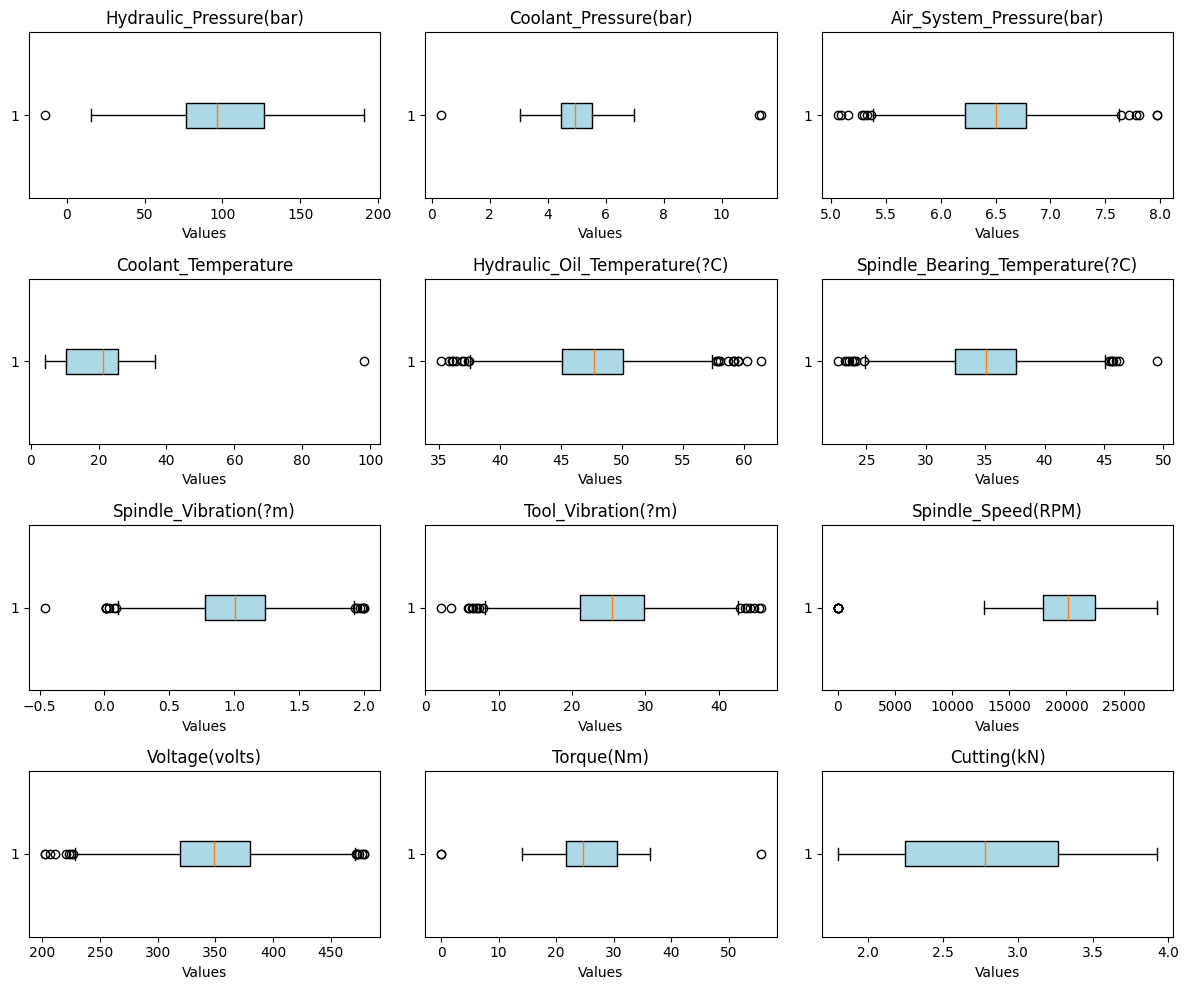

In [73]:

# Columns jo aapke data mein hain
columns = ['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
           'Coolant_Temperature', 'Hydraulic_Oil_Temperature(?C)', 'Spindle_Bearing_Temperature(?C)',
           'Spindle_Vibration(?m)', 'Tool_Vibration(?m)', 'Spindle_Speed(RPM)',
           'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)']

# Subplots banate hain (multiple boxplots ke liye)
plt.figure(figsize=(12, 10))

# Loop for each column to create boxplot
for i, column in enumerate(columns, 1):
    plt.subplot(4, 3, i)  # 4 rows, 3 columns
    plt.boxplot(X[column].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(column)
    plt.xlabel("Values")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


now handling null values :

In [74]:
#Importing Libraries for it :

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [75]:
X.head(2)

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
0,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58
1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68


In [90]:
# 1st those which don't have outliers : standardization

columns_with_Outlier = ['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Coolant_Temperature',
                    'Spindle_Speed(RPM)', 'Torque(Nm)', 'Cutting(kN)']

# Scaler initialize karo
scaler = StandardScaler()

# Sirf selected columns ka scaling karo
X_scaled1 = X.copy()
X_scaled1[columns_with_Outlier] = scaler.fit_transform(X[columns_with_Outlier])




In [91]:
print(X_scaled1)

      Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  \
0                   -1.002835               1.992332   
1                    0.789907              -0.010196   
2                   -1.000194               1.897752   
3                    1.252539              -0.373739   
4                   -1.350553               1.951674   
...                       ...                    ...   
2495                 0.373356               0.274607   
2496                 0.055396               0.265583   
2497                 0.569097               0.266691   
2498                 1.467703               0.261462   
2499                -0.155832               0.992373   

      Air_System_Pressure(bar)  Coolant_Temperature  \
0                     6.284965             0.823139   
1                     6.196733             1.957276   
2                     6.655448            -0.638377   
3                     6.560394             0.682834   
4                     6.141238            -1.690669 

In [86]:
# 1st those which don't have outliers : standardization

columns_without_Outlier = ['Air_System_Pressure(bar)', 'Hydraulic_Oil_Temperature(?C)', 'Spindle_Bearing_Temperature(?C)',
                    'Spindle_Vibration(?m)', 'Tool_Vibration(?m)', 'Voltage(volts)']

# Scaler initialize karo
scaler = StandardScaler()

# Sirf selected columns ka scaling karo
#X_scaled2 = X.copy()
X_scaled2[columns_without_Outlier] = scaler.fit_transform(X[columns_without_Outlier])




In [87]:
print(X_scaled2)

      Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  \
0                   71.040000               6.933725   
1                  125.330000               4.936892   
2                   71.120000               6.839413   
3                  139.340000               4.574382   
4                   60.510000               6.893182   
...                       ...                    ...   
2495               112.715506               5.220885   
2496               103.086653               5.211886   
2497               118.643165               5.212991   
2498               145.855859               5.207777   
2499                96.690000               5.936610   

      Air_System_Pressure(bar)  Coolant_Temperature  \
0                    -0.526305                 25.6   
1                    -0.742986                 35.3   
2                     0.383534                 13.1   
3                     0.150098                 24.4   
4                    -0.879271                  4.1 

In [92]:
# Sirf scaled columns ko retain karo
X_scaled1 = X_scaled1[columns_with_Outlier]

# Check output
print(X_scaled1.head())


   Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  Coolant_Temperature  \
0                -1.002835               1.992332             0.823139   
1                 0.789907              -0.010196             1.957276   
2                -1.000194               1.897752            -0.638377   
3                 1.252539              -0.373739             0.682834   
4                -1.350553               1.951674            -1.690669   

   Spindle_Speed(RPM)  Torque(Nm)  Cutting(kN)  
0            1.458300   -0.192208     1.293374  
1           -0.108724   -1.797538    -0.166327  
2           -0.110022   -0.193195     1.244718  
3           -0.470884    0.101846     1.244718  
4            1.622895    0.045770     1.244718  


In [93]:
# Sirf scaled columns ko retain karo
X_scaled2 = X_scaled2[columns_without_Outlier]

# Check output
print(X_scaled2.head())


   Air_System_Pressure(bar)  Hydraulic_Oil_Temperature(?C)  \
0                 -0.526305                      -0.429499   
1                 -0.742986                      -0.057941   
2                  0.383534                      -1.836113   
3                  0.150098                      -0.907217   
4                 -0.879271                      -0.084481   

   Spindle_Bearing_Temperature(?C)  Spindle_Vibration(?m)  Tool_Vibration(?m)  \
0                        -0.441995               0.821592            0.167814   
1                        -0.123191               1.087030           -0.021439   
2                        -0.548263               0.903265            0.807357   
3                         1.470829              -1.141485            0.835791   
4                        -0.973335              -0.076815            0.016163   

   Voltage(volts)  
0       -0.308524  
1        0.418878  
2       -0.528949  
3        0.242538  
4        0.110283  


In [94]:
# now handling filling null values : thosw wihtout outlier :

imputer = SimpleImputer(strategy='mean')
X_imputed1 = imputer.fit_transform(X_scaled1)

In [95]:
# now handling filling null values : thosw wiht outlier :

imputer = SimpleImputer(strategy='median')
X_imputed2 = imputer.fit_transform(X_scaled2)

In [99]:
Final_data = pd.concat([X_scaled1, X_scaled2], axis=1)

In [100]:
Final_data.head()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Coolant_Temperature,Spindle_Speed(RPM),Torque(Nm),Cutting(kN),Air_System_Pressure(bar),Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Voltage(volts)
0,-1.002835,1.992332,0.823139,1.458300,-0.192208,1.293374,-0.526305,-0.429499,-0.441995,0.821592,0.167814,-0.308524
1,0.789907,-0.010196,1.957276,-0.108724,-1.797538,-0.166327,-0.742986,-0.057941,-0.123191,1.087030,-0.021439,0.418878
2,-1.000194,1.897752,-0.638377,-0.110022,-0.193195,1.244718,0.383534,-1.836113,-0.548263,0.903265,0.807357,-0.528949
3,1.252539,-0.373739,0.682834,-0.470884,0.101846,1.244718,0.150098,-0.907217,1.470829,-1.141485,0.835791,0.242538
4,-1.350553,1.951674,-1.690669,1.622895,0.045770,1.244718,-0.879271,-0.084481,-0.973335,-0.076815,0.016163,0.110283


In [101]:
correlation = Final_data.corr()

<Axes: >

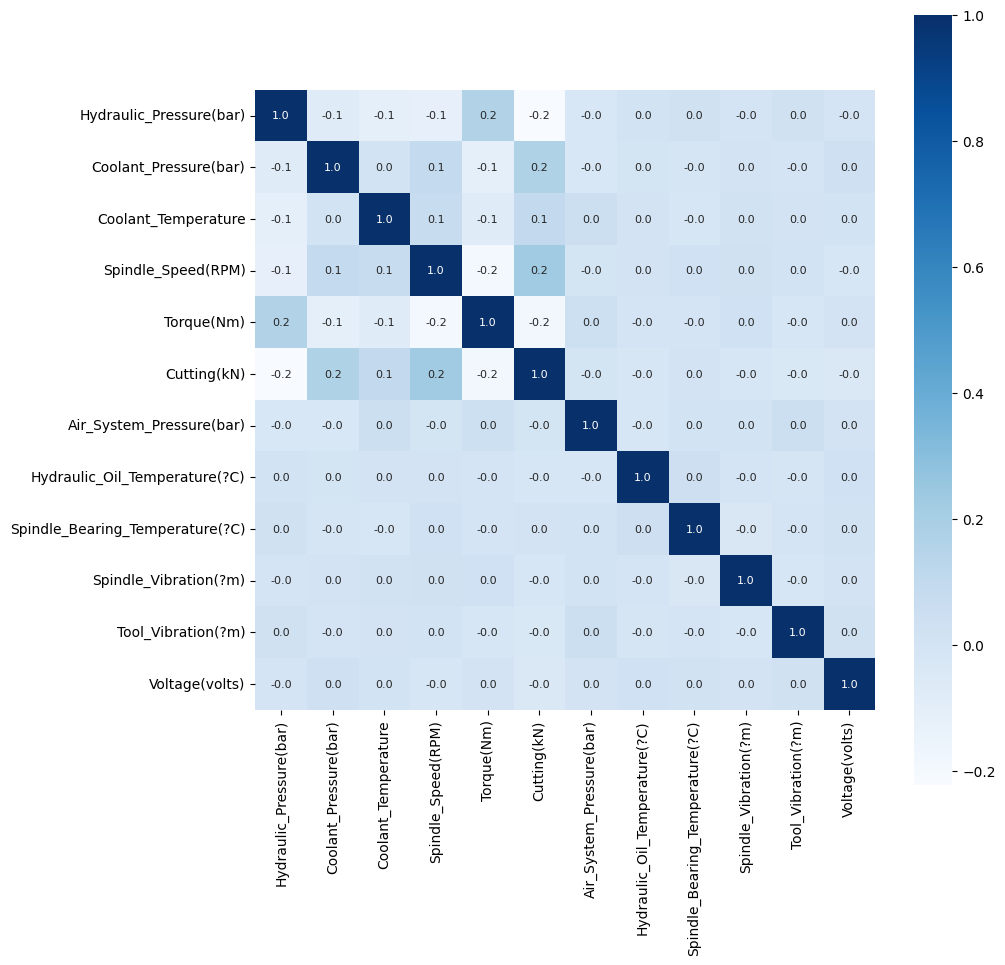

In [102]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

Since there are many col which are not relavent to other , so we will drop them:

In [105]:
Final_data = Final_data.drop(columns=['Air_System_Pressure(bar)', 'Hydraulic_Oil_Temperature(?C)', 'Spindle_Bearing_Temperature(?C)', 'Spindle_Vibration(?m)', 'Tool_Vibration(?m)', 'Voltage(volts)'], axis=1)


In [107]:
Final_data.head()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Coolant_Temperature,Spindle_Speed(RPM),Torque(Nm),Cutting(kN)
0,-1.002835,1.992332,0.823139,1.458300,-0.192208,1.293374
1,0.789907,-0.010196,1.957276,-0.108724,-1.797538,-0.166327
2,-1.000194,1.897752,-0.638377,-0.110022,-0.193195,1.244718
3,1.252539,-0.373739,0.682834,-0.470884,0.101846,1.244718
4,-1.350553,1.951674,-1.690669,1.622895,0.045770,1.244718


Now splitting data for training and testing :

In [110]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(Final_data, Y, test_size=0.2, random_state=2)

In [130]:
X_train.shape, X_test.shape

((2000, 6), (500, 6))

Now Model Training :

In [131]:
from sklearn.tree import DecisionTreeClassifier


In [138]:
model = DecisionTreeClassifier()

In [139]:
model.fit(X_train, Y_train)

DecisionTreeClassifier()

Model Evaluation :

In [140]:
from sklearn.metrics import accuracy_score, f1_score

from sklearn.preprocessing import LabelEncoder

In [141]:
# Training data ke liye prediction karo
y_train_pred = model.predict(X_train)

# Training data pe accuracy calculate karo
train_accuracy = accuracy_score(Y_train, y_train_pred)

# Training data pe F1-score calculate karo
train_f1 = f1_score(Y_train, y_train_pred)

print("Training Accuracy:", train_accuracy)
print("Training F1-Score:", train_f1)

Training Accuracy: 1.0
Training F1-Score: 1.0


its overfitting , now we'll reduce it :

In [144]:

model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [145]:
# Training data ke liye prediction karo
y_train_pred = model.predict(X_train)

# Training data pe accuracy calculate karo
train_accuracy = accuracy_score(Y_train, y_train_pred)

# Training data pe F1-score calculate karo
train_f1 = f1_score(Y_train, y_train_pred)

print("Training Accuracy:", train_accuracy)
print("Training F1-Score:", train_f1)

Training Accuracy: 0.968
Training F1-Score: 0.9688715953307393


Now on test data :

In [146]:
# Test data ke liye prediction karo
y_test_pred = model.predict(X_test)

# Test data pe accuracy calculate karo
test_accuracy = accuracy_score(Y_test, y_test_pred)

# Test data pe F1-score calculate karo
test_f1 = f1_score(Y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)
print("Test F1-Score:", test_f1)

Test Accuracy: 0.94
Test F1-Score: 0.9397590361445783


Building a Predictive System :

In [148]:
input_data = (-1.000194,	1.897752,	-0.638377,	-0.110022,	-0.193195,	1.244718)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Machine_Failure')
else:
  print('No_Machine_Failure')

[1]
Machine_Failure


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
